In [1]:
from polypy import Read as rd
from polypy import Density as Dens
import numpy as np
import matplotlib.pyplot as plt

In [2]:
timestep = 0.25
data = rd.read_history("../../../OLD/data/HIST", ["U", "O"])


In [3]:
# Create Density object

total_density = Dens.Density(data)
ca_density = Dens.Density(data, atom_type="U")
f_density = Dens.Density(data, atom_type="O")

{'label': array(['U', 'U', 'U', ..., 'O', 'O', 'O'], dtype='<U1'), 'trajectories': array([[-13.073, -13.548, -16.176],
       [-16.178, -13.436, -13.578],
       [-13.417, -16.172, -13.552],
       ...,
       [ 15.786,  13.195,  15.895],
       [ 12.75 ,  15.697,  15.985],
       [ 15.277,  15.975,  15.756]]), 'lv': array([[33.22, 33.33, 33.37],
       [33.22, 33.33, 33.37],
       [33.22, 33.33, 33.37],
       ...,
       [33.22, 33.33, 33.37],
       [33.22, 33.33, 33.37],
       [33.22, 33.33, 33.37]]), 'timesteps': 476, 'natoms': 2577}


In [4]:
plane = total_density.one_dimensional_density_sb(ul=5.0, ll=-5.0)
print("Total Number of U and O Between -5.0 - 5.0 :", plane, " across ", data['timesteps'], "timesteps")

plane = ca_density.one_dimensional_density_sb(ul=5.0, ll=-5.0)
print("Total Number of U Between -5.0 - 5.0 :", plane, " across ", data['timesteps'], "timesteps")

plane = f_density.one_dimensional_density_sb(ul=5.0, ll=-5.0)
print("Total Number of O Between -5.0 - 5.0 :", plane, " across ", data['timesteps'], "timesteps")

Total Number of U and O Between -5.0 - 5.0 : 384185  across  476 timesteps
Total Number of U Between -5.0 - 5.0 : 111306  across  476 timesteps
Total Number of O Between -5.0 - 5.0 : 272879  across  476 timesteps


16.685000000000002 33.35


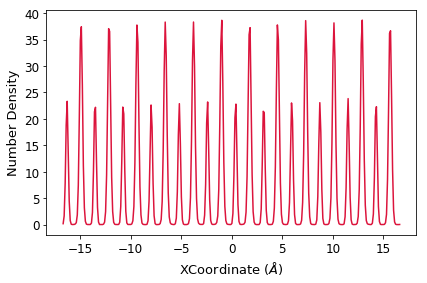

16.685000000000002 33.35


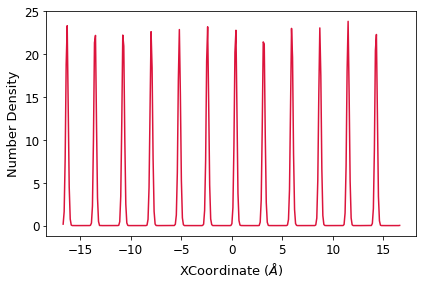

16.685000000000002 33.225


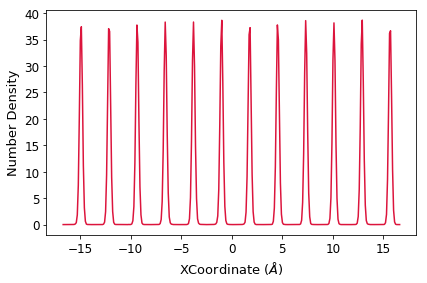

334
334


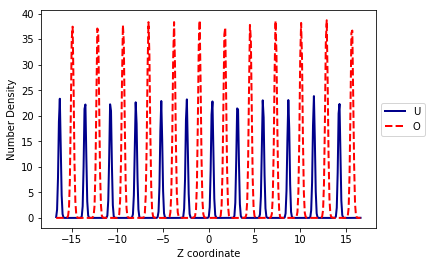

In [5]:
# 4) One Dimensional Density Plot
tx, ty = total_density.one_dimensional_density(Bin=0.1, direction="z")
cx, cy = ca_density.one_dimensional_density(Bin=0.1, direction="z")
fx, fy = f_density.one_dimensional_density(Bin=0.1, direction="z")

plt.plot(cx, cy, color="darkblue", ls="-", lw=2, label="U")
plt.plot(fx, fy, color="red", ls="--", lw=2, label="O")
plt.ylabel("Number Density")
plt.xlabel("Z coordinate")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

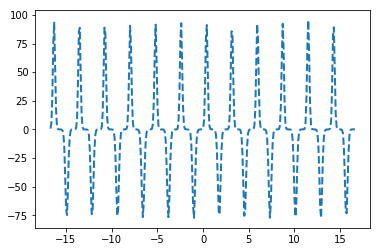

In [6]:
cation_charge = cy * 4
anion_charge = fy * -2

charge_density = cation_charge + anion_charge

plt.plot(fx, charge_density, ls="--", lw=2)
plt.show()

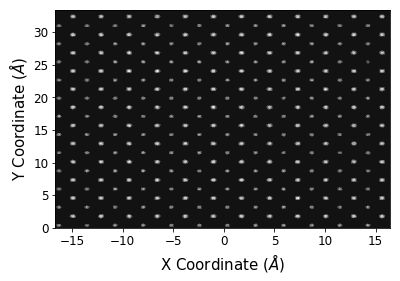

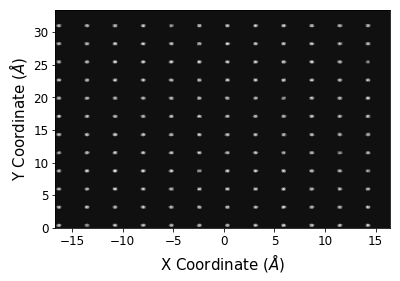

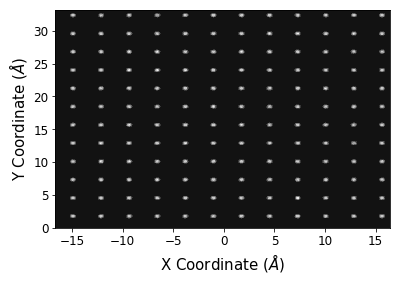

In [7]:
# 5) Two Dimensional Density Plot

tx, ty, tz = total_density.two_dimensional_density(box=0.1)
cx, cy, cz = ca_density.two_dimensional_density(box=0.1)
fx, fy, fz = f_density.two_dimensional_density(box=0.1)



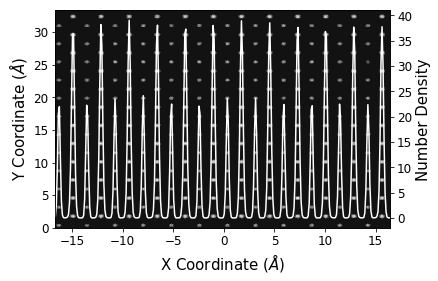

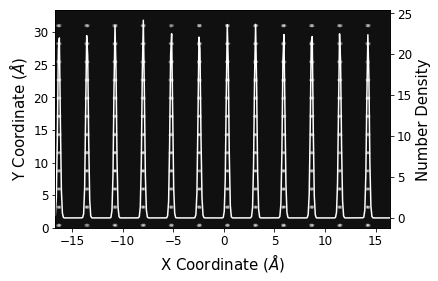

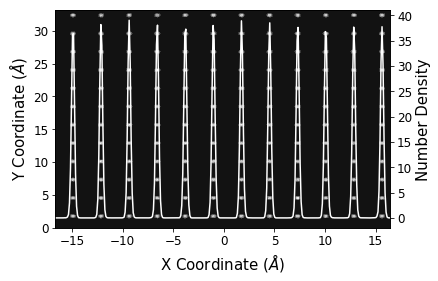

In [8]:
total_density.one_and_two_dimension_overlay(box=0.1)
ca_density.one_and_two_dimension_overlay(box=0.1)
f_density.one_and_two_dimension_overlay(box=0.1)